In [1]:
import nltk
nltk.download("book",quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
# 제인 오스틴의 엠마 문서
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [20]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [11]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [16]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer('[\w]+')
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [26]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1= PorterStemmer()
st2= LancasterStemmer()

words = ['fly','flies','flying','flew','flown']

print('porter stemmer :', [st1.stem(w) for w in words])
print('lancaster stemmer :', [st2.stem(w) for w in words])


porter stemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
lancaster stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


In [29]:
ps = []
ls = []

for w in words:
    ps.append(st1.stem(w))
    ls.append(st2.stem(w))
print(ps)
print(ls)

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [35]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w,pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [38]:
lem = []
for w in words:
    lem.append(lm.lemmatize(w,pos='v'))
print(lem)

['fly', 'fly', 'fly', 'fly', 'fly']


In [39]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [54]:
from nltk.tag import pos_tag
sentence = 'emma refused to permit us to obtain the refuse permit'
#sentence = '12월 20일에 베트남으로 출발한다'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('emma', 'NN'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [56]:
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list

['emma', 'refuse', 'permit']

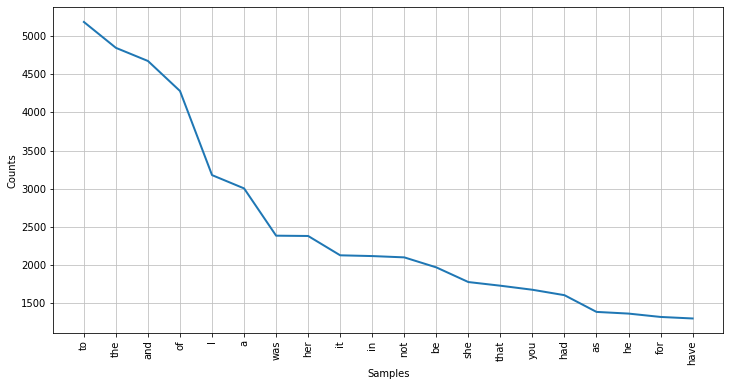

In [61]:
from nltk import text
import matplotlib.pyplot as plt
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))
%matplotlib inline

plt.figure(figsize=(12,6))
text.plot(20)
plt.show()

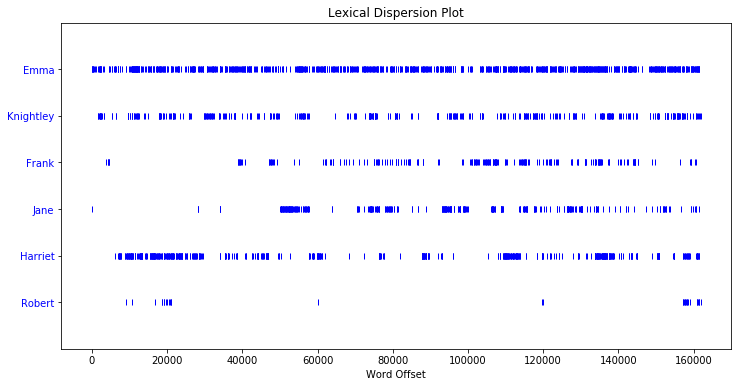

In [62]:
# dispersion_plot() - 단어가 사용된 위치를 시각화
plt.figure(figsize=(12, 6))
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [65]:
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


In [63]:
# concordance() - 해당 단어의 앞과 뒤에 사용된 단어(문맥)를 보여줌
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [66]:
# similar() - 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾아줌
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [67]:
# common_contexts() - 두 단어의 공통 문맥
text.common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [68]:
# Text 클래스의 vocab 메서드로 추출 
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [69]:
# 직접 클래스를 생성
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [70]:
# 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [71]:
# most_common() - 가장 출현 횟수가 높은 단어를 찾아줌
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

In [72]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.figure(figsize=(12, 8))
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'